In [2]:
import sys
sys.path.insert(0,'/Users/august/Coding/topic-modelling')

In [3]:
from topic_modelling.data_loader import DataLoader
from topic_modelling.kmeans import KMeansCluster
import seaborn as sns
from sklearn.decomposition import PCA

data_path = "../data/abcnews_lem_stem.pickle"
dl = DataLoader()
n_rows = 10000
corpus = dl.load(data_path, n_rows=n_rows)
topics = 9
cluster = KMeansCluster(corpus, TFIDF_method="native", num_clusters=topics)

doc_clusters, _ = cluster.cluster_documents(verbosity=False)
centers = cluster.cluster_centers

Read processed data from: ../data/abcnews_lem_stem.pickle
fitted TF-IDF matrix


In [ ]:
categories = ['topic ' + str(i+1) for i in range(topics)]

In [ ]:
pca = PCA(n_components=9).fit(centers)
X_pca = pca.transform(centers)

In [ ]:
sizes = [len(cluster) for cluster in doc_clusters]

In [ ]:
data = {
    "x1": X_pca[:,0],
    "x2": X_pca[:, 1],
    "weight": sizes
    }

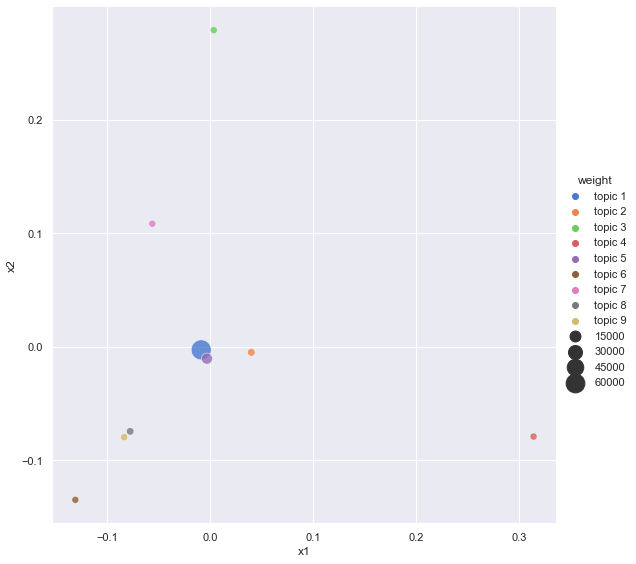

In [ ]:
sns.set(rc={'figure.figsize':(20,20)})
relplot = sns.relplot(
    x="x1", y="x2", hue=categories, size="weight",
    sizes=(50, 400), alpha=0.8, palette="muted",
    data=data, legend="auto", height=8)
fig = relplot.fig
fig.savefig(f"../topic_modelling/images/kmeans/PCA/PCA_{n_rows}x{topics}.png") 